# **BA875 : OPERATIONS AND SUPPLY CHAIN ANALYTICS**

**Team 6**

**Members** : Gaurangi Agrawal, Saachi Dholakia, Sahasra Konkala, Madhumitha Sriram, Rajashree Ramaprabu

**Data set**:

* **MSCI** : https://drive.google.com/drive/folders/1bHeKVn-scXI6HmgJNZ59MjKVjjuVRPZc

* **Finance** : https://drive.google.com/drive/folders/1GXkMHmEPLMhxkeJeHpmVYNCclfAzj6O8



* **Tableau:** https://public.tableau.com/app/profile/gaurangi.agrawal/viz/SupplyChainPolicies/Story1?publish=yes

* **Presentation:** https://docs.google.com/presentation/d/1_siY_voLoCTalVARSZOdK-xXe5ka_KCilA5075w8pvo/edit?usp=sharing

#1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#2. Data Preprocessing

In [ ]:
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/Spring_2024/BA875/Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here we are loading the MSCI ESG data set, which is merged with the finance compustat data set

In [ ]:
df = pd.read_csv(data_folder+'MSCI_KLD_ESG_Activity_withIBES_withCompustat_subset.csv', index_col=0).reset_index()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77313 entries, 0 to 77312
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   companyname                 77313 non-null  object 
 1   cusip                       64465 non-null  object 
 2   ticker                      76741 non-null  object 
 3   country                     29202 non-null  object 
 4   year                        77313 non-null  int64  
 5   Supply_Chain_Policies       47814 non-null  object 
 6   Hazardous_Waste             29497 non-null  float64
 7   Regulatory_Problems         50902 non-null  object 
 8   Substantial_Emissions       77304 non-null  object 
 9   Supply_Chain_Management     40863 non-null  object 
 10  Pollution_Prevention        77311 non-null  object 
 11  Recycling                   77311 non-null  object 
 12  Waste_Mgt_Electronic_Waste  37575 non-null  object 
 13  Product_Safety              745

In [ ]:
df.head()

,companyname,cusip,ticker,country,year,Supply_Chain_Policies,Hazardous_Waste,Regulatory_Problems,Substantial_Emissions,Supply_Chain_Management,...,ppent,revt,xrd,xsga,busdesc,city,gind,gsector,naics,sic
0,"AuthenTec, Inc.",52660107,NaN,NaN,2010,0,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,iPath Optimized Currency Carry ETN is an excha...,London,NaN,NaN,NaN,6722.0
1,"AuthenTec, Inc.",52660107,NaN,NaN,2010,0,NaN,0,0,NaN,...,123.0,3083.0,NaN,928.0,HSBC Bank Canada provides various financial pr...,Vancouver,401010.0,40.0,522110.0,6020.0
2,"AuthenTec, Inc.",52660107,NaN,NaN,2010,0,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,iPath MSCI India Index ETN is an exchange trad...,London,NaN,NaN,NaN,6722.0
3,"AuthenTec, Inc.",52660107,NaN,NaN,2010,0,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,"As of June 9, 2015, GS Connect S&P GSCI Enhanc...",New York,NaN,NaN,NaN,6726.0
4,"AuthenTec, Inc.",52660107,NaN,NaN,2010,0,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,VanEck Vectors - Double Long Euro ETN is an ex...,New York,NaN,NaN,NaN,6722.0


In [ ]:
df.isna().sum()

companyname                       0
cusip                         12848
ticker                          572
country                       48111
year                              0
Supply_Chain_Policies         29499
Hazardous_Waste               47816
Regulatory_Problems           26411
Substantial_Emissions             9
Supply_Chain_Management       36450
Pollution_Prevention              2
Recycling                         2
Waste_Mgt_Electronic_Waste    39738
Product_Safety                 2798
Product_Number_Concerns       32200
Quality                           2
R_and_D_Innovation            47816
gvkey                         46230
roa                           46250
invt_act                      53853
cash_conversion               54761
inv_turn                      54073
at_turn                       46545
rd_sale                       46230
staff_sale                    46612
conm                          47999
curncd                        47999
at                          

In [ ]:
df.describe()

,year,Hazardous_Waste,Product_Number_Concerns,R_and_D_Innovation,gvkey,roa,invt_act,cash_conversion,inv_turn,at_turn,...,ni,ppegt,ppent,revt,xrd,xsga,gind,gsector,naics,sic
count,77313.000000,29497.000000,45113.000000,29497.000000,31083.000000,31063.000000,23460.000000,2.255200e+04,23240.000000,30768.000000,...,23746.000000,22926.000000,26739.000000,28392.000000,12878.000000,20108.000000,28488.000000,28488.000000,29047.000000,29314.000000
mean,2010.650253,0.063634,0.206216,0.024274,65732.413570,0.070021,0.196978,1.158826e+04,52.895054,0.794454,...,508.815282,4903.990807,2442.083835,6159.756699,268.772375,1176.232074,352601.470268,35.086177,423124.980377,5140.413454
std,6.872669,0.244103,0.538765,0.153900,68159.061093,0.712397,0.202113,8.067289e+05,1269.485955,0.786565,...,2317.310538,20144.247532,10196.415424,20626.642655,1177.170896,4199.360228,131953.031172,13.204306,153785.092415,1853.875050
min,1991.000000,0.000000,0.000000,0.000000,1004.000000,-118.970000,0.000000,8.000000e-03,-0.735750,0.000000,...,-23119.000000,0.000000,0.000000,-1579.000000,0.000000,-16.521000,101010.000000,10.000000,42.000000,100.000000
25%,2006.000000,0.000000,0.000000,0.000000,11032.000000,0.025000,0.004250,3.522281e+01,2.717500,0.248500,...,9.070500,78.390747,36.615002,327.966005,0.007500,84.700496,252010.000000,25.000000,332991.000000,3640.000000
50%,2012.000000,0.000000,0.000000,0.000000,27199.000000,0.094750,0.146750,6.824038e+01,5.174250,0.629750,...,68.032501,459.364000,178.164990,1047.341950,28.984500,225.484000,401010.000000,40.000000,515210.000000,6020.000000
75%,2017.000000,0.000000,0.000000,0.000000,137024.000000,0.153750,0.324288,1.222854e+02,12.500062,1.090313,...,286.226245,2183.532500,911.043490,3702.000000,105.772750,673.624987,404020.000000,40.000000,524113.000000,6722.000000
max,2019.000000,1.000000,4.000000,1.000000,328795.000000,1.912000,3.070500,8.303000e+07,120266.000000,22.051199,...,98806.047000,493335.000000,259651.000000,521426.000000,35931.000000,107669.000000,602010.000000,60.000000,999990.000000,9997.000000


In [ ]:
for column in df.columns:
    df[column] = df[column].replace('R', 0.5)


The "R" signifies that the company's compliance with a specific ESG indicator has been thoroughly researched and verified. However, the findings suggest a nuanced outcome that falls somewhere between full compliance (indicated by "1") and non-compliance (indicated by "0"). This could be interpreted as a work-in-progress for the company, reflecting a score of 0.5 to indicate ongoing efforts towards achieving full compliance.

In [ ]:
columns_to_convert = ['Supply_Chain_Policies','Hazardous_Waste', 'Regulatory_Problems', 'Substantial_Emissions',
                      'Supply_Chain_Management', 'Pollution_Prevention', 'Recycling',
                      'Waste_Mgt_Electronic_Waste', 'Product_Safety', 'Quality',
                      'R_and_D_Innovation','gsector']

for column in columns_to_convert:
    df[column] = df[column].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77313 entries, 0 to 77312
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   companyname                 77313 non-null  object  
 1   cusip                       64465 non-null  object  
 2   ticker                      76741 non-null  object  
 3   country                     29202 non-null  object  
 4   year                        77313 non-null  int64   
 5   Supply_Chain_Policies       47814 non-null  category
 6   Hazardous_Waste             29497 non-null  category
 7   Regulatory_Problems         50902 non-null  category
 8   Substantial_Emissions       77304 non-null  category
 9   Supply_Chain_Management     40863 non-null  category
 10  Pollution_Prevention        77311 non-null  category
 11  Recycling                   77311 non-null  category
 12  Waste_Mgt_Electronic_Waste  37575 non-null  category
 13  Product_Safety  

Converting MSCI ESG Columns to categorical data set as it has only (0, 0.5 , 1) values.

##Null Values

Here we aim to visualise and understand the all the null values in the data set. We look at possible imputation and dropping while handling these values to cater to the regression.

In [ ]:
null_percentage = round((df.isnull().sum() / len(df)) * 100,0)
print("Percentage of null values in each column:")
null_percentage

Percentage of null values in each column:


companyname                    0.0
cusip                         17.0
ticker                         1.0
country                       62.0
year                           0.0
Supply_Chain_Policies         38.0
Hazardous_Waste               62.0
Regulatory_Problems           34.0
Substantial_Emissions          0.0
Supply_Chain_Management       47.0
Pollution_Prevention           0.0
Recycling                      0.0
Waste_Mgt_Electronic_Waste    51.0
Product_Safety                 4.0
Product_Number_Concerns       42.0
Quality                        0.0
R_and_D_Innovation            62.0
gvkey                         60.0
roa                           60.0
invt_act                      70.0
cash_conversion               71.0
inv_turn                      70.0
at_turn                       60.0
rd_sale                       60.0
staff_sale                    60.0
conm                          62.0
curncd                        62.0
at                            63.0
capx                

### Frequency of Null

In [ ]:
df_year=df.sort_values(by='year')

<Figure size 1000x800 with 0 Axes>

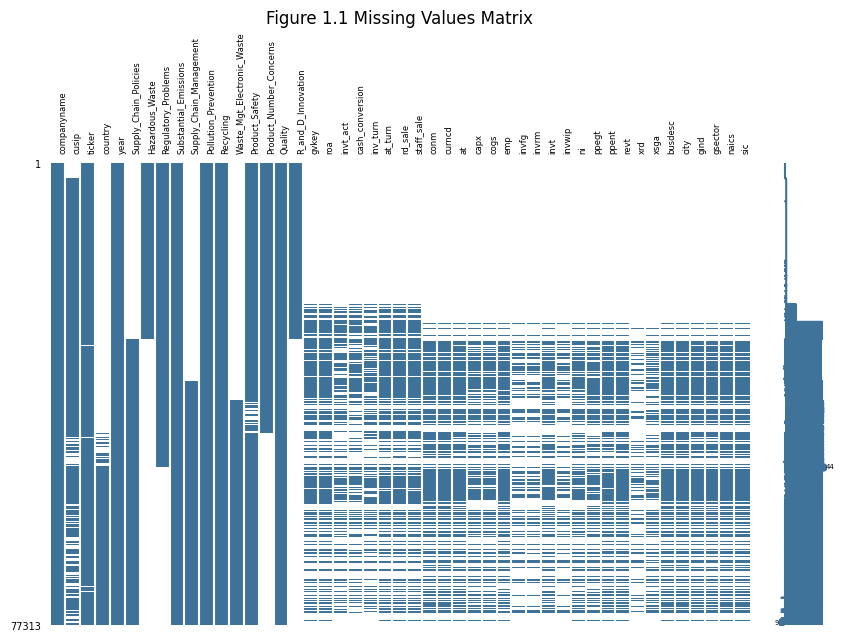

In [ ]:
plt.figure(figsize=(10, 8))
msno.matrix(df_year, figsize=(10, 6), color=(0.25, 0.45, 0.60),fontsize=6)
plt.title('Figure 1.1 Missing Values Matrix')
plt.xticks(rotation=90)
plt.show()


This visualization ( Figure 1.1) illustrates the distribution of null values within the dataset, sorted by year. By discerning the temporal patterns of missing data, we gain valuable insights into the availability and reliability of our dataset over time, thus facilitating more informed analysis in future endeavors

In [ ]:
null_percentage_df = pd.DataFrame()

for year in df_year['year'].unique():
    df_year_subset = df_year[df_year['year'] == year]
    null_percentage = (df_year_subset.isnull().sum() / len(df_year_subset)) * 100
    null_percentage['year'] = year
    null_percentage = null_percentage.round()
    null_percentage_df = pd.concat([null_percentage_df, null_percentage.to_frame().T])

null_percentage_df = null_percentage_df[['year'] + [col for col in null_percentage_df.columns if col != 'year']]
null_percentage_df


,year,companyname,cusip,ticker,country,Supply_Chain_Policies,Hazardous_Waste,Regulatory_Problems,Substantial_Emissions,Supply_Chain_Management,...,ppent,revt,xrd,xsga,busdesc,city,gind,gsector,naics,sic
0,1991.0,0.0,100.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0,1992.0,0.0,100.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0,1993.0,0.0,100.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0,1994.0,0.0,100.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0,1995.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0,1996.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0,1997.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0,1998.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0,1999.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0,2000.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


The table above presents the percentage of null values within each feature for every year in our dataset.
This  breakdown offers a detailed insight into the completeness of data across different variables over time, providing a valuable foundation for robust analytical approaches and informed decision-making.

##G Sector

In [ ]:
gsector_dict = {
    10: 'Energy',
    15: 'Materials',
    20: 'Industrials',
    25: 'Consumer Discretionary',
    30: 'Consumer Staples',
    35: 'Health Care',
    40: 'Financials',
    45: 'Information Technology',
    50: 'Communication Services',
    55: 'Utilities',
    60: 'Real Estate'
}
df['GICS Sector Name'] = df['gsector'].map(gsector_dict)
df

,companyname,cusip,ticker,country,year,Supply_Chain_Policies,Hazardous_Waste,Regulatory_Problems,Substantial_Emissions,Supply_Chain_Management,...,revt,xrd,xsga,busdesc,city,gind,gsector,naics,sic,GICS Sector Name
0,"AuthenTec, Inc.",52660107,NaN,NaN,2010,0,NaN,0,0,NaN,...,NaN,NaN,NaN,iPath Optimized Currency Carry ETN is an excha...,London,NaN,NaN,NaN,6722.0,NaN
1,"AuthenTec, Inc.",52660107,NaN,NaN,2010,0,NaN,0,0,NaN,...,3083.0000,NaN,928.000,HSBC Bank Canada provides various financial pr...,Vancouver,401010.0,40.0,522110.0,6020.0,Financials
2,"AuthenTec, Inc.",52660107,NaN,NaN,2010,0,NaN,0,0,NaN,...,NaN,NaN,NaN,iPath MSCI India Index ETN is an exchange trad...,London,NaN,NaN,NaN,6722.0,NaN
3,"AuthenTec, Inc.",52660107,NaN,NaN,2010,0,NaN,0,0,NaN,...,NaN,NaN,NaN,"As of June 9, 2015, GS Connect S&P GSCI Enhanc...",New York,NaN,NaN,NaN,6726.0,NaN
4,"AuthenTec, Inc.",52660107,NaN,NaN,2010,0,NaN,0,0,NaN,...,NaN,NaN,NaN,VanEck Vectors - Double Long Euro ETN is an ex...,New York,NaN,NaN,NaN,6722.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77308,Zions Bancorporation,98970110,ZION,NaN,2014,0.5,NaN,0.5,0,0,...,2361.6311,NaN,NaN,"Zions Bancorporation, National Association pro...",Salt Lake City,401010.0,40.0,522110.0,6020.0,Financials
77309,ZIONS BANCORPORATION,98970110,ZION,US,2015,0.5,NaN,NaN,0,0,...,2210.5911,NaN,1215.437,"Zions Bancorporation, National Association pro...",Salt Lake City,401010.0,40.0,522110.0,6020.0,Financials
77310,ZIONS BANCORPORATION,98970110,ZION,US,2016,0.5,NaN,NaN,0,0,...,2469.9231,NaN,NaN,"Zions Bancorporation, National Association pro...",Salt Lake City,401010.0,40.0,522110.0,6020.0,Financials
77311,"ZIONS BANCORPORATION, NATIONAL ASSOCIATION",98970110,ZION,US,2018,0.5,NaN,NaN,0,0,...,3033.0000,NaN,1328.000,"Zions Bancorporation, National Association pro...",Salt Lake City,401010.0,40.0,522110.0,6020.0,Financials


In [ ]:
df.to_csv('df_final.csv')

Adding the meaning of each sector to corresponding rows in the data set.

##Correlation Matrix

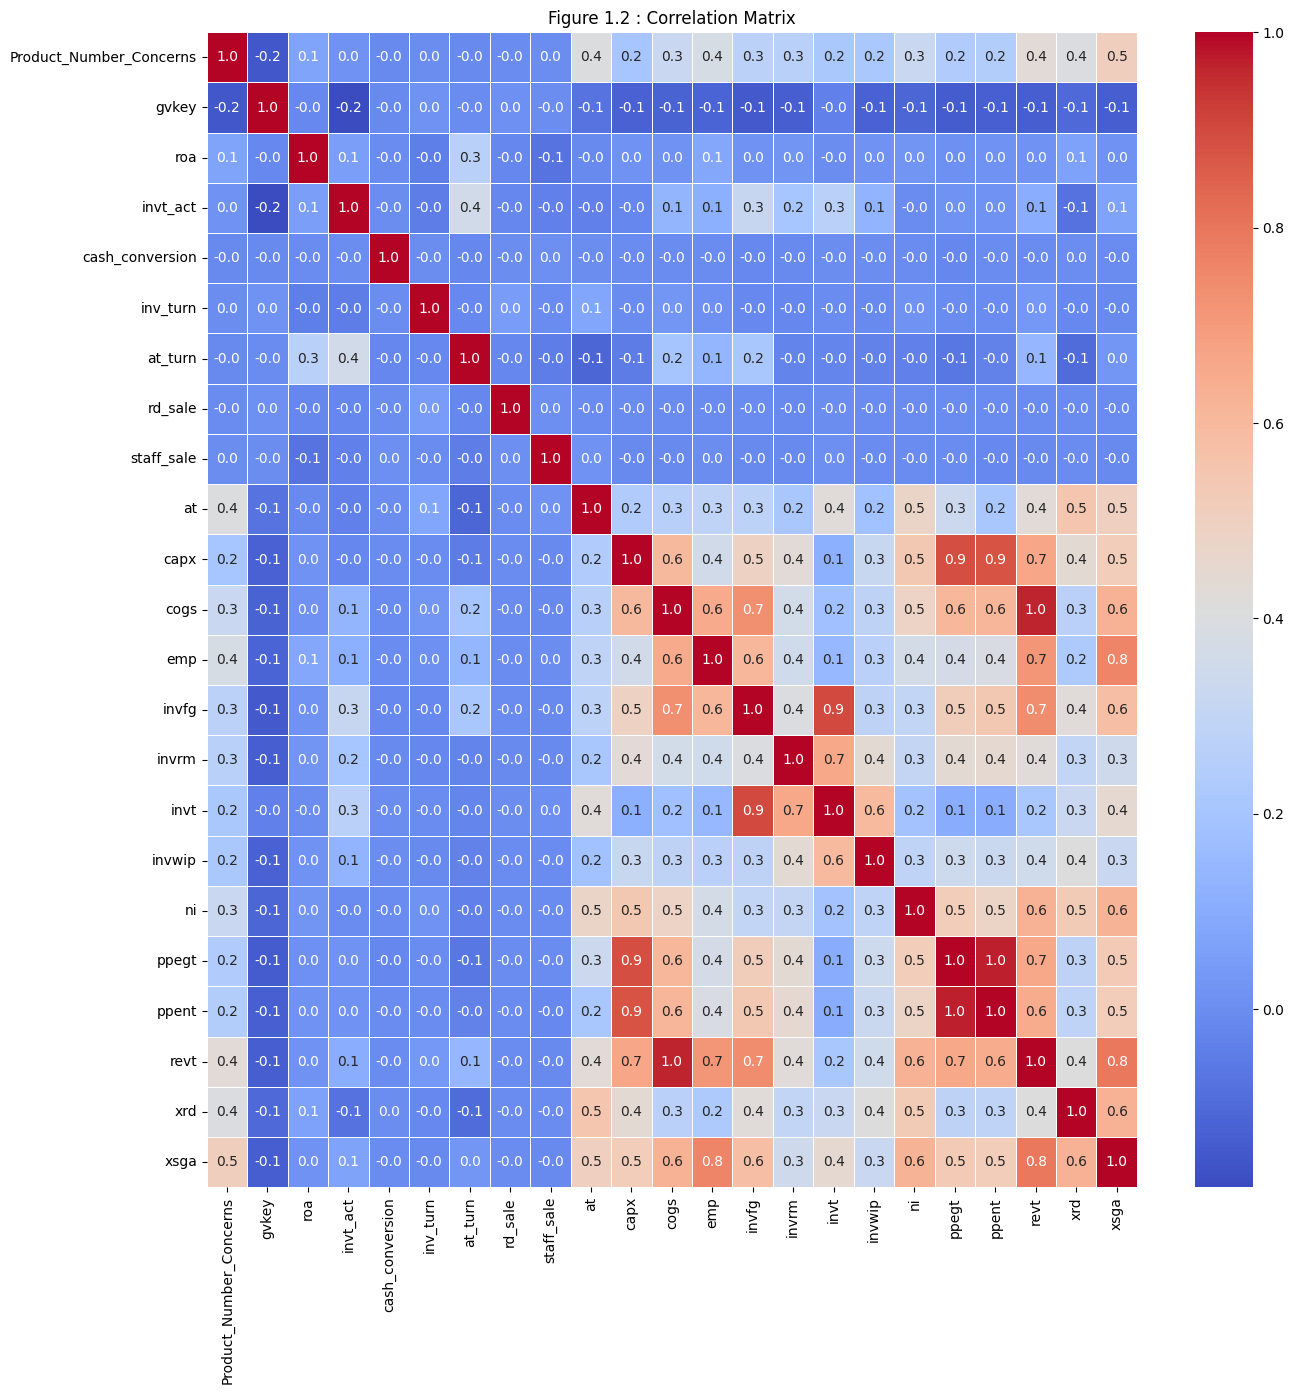

In [ ]:
numeric_df = df.select_dtypes(include='number').drop(columns=['year', 'gind', 'naics', 'sic'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Figure 1.2 : Correlation Matrix')
plt.show()

The correlation matrix provided encompasses all numerical columns within the dataset. Notably, it highlights significant collinearity among specific financial variables:

* Total Revenue (revt) and Selling, General, and Administrative Expense (xsga)
* Capital Expenditures (capx), Property, Plant, and Equipment - Total Gross (ppegt), and Property, Plant, and Equipment - Total Net (ppent)
* Inventories - Total (invt) and Inventories Finished Goods (invfg)

Awareness of these interrelationships prompts a cautious approach when incorporating these variables into regression analyses, ensuring accurate and reliable model outcomes.

#3. Exploratory Data Analysis

## Revenue : Recycling and Waste Management

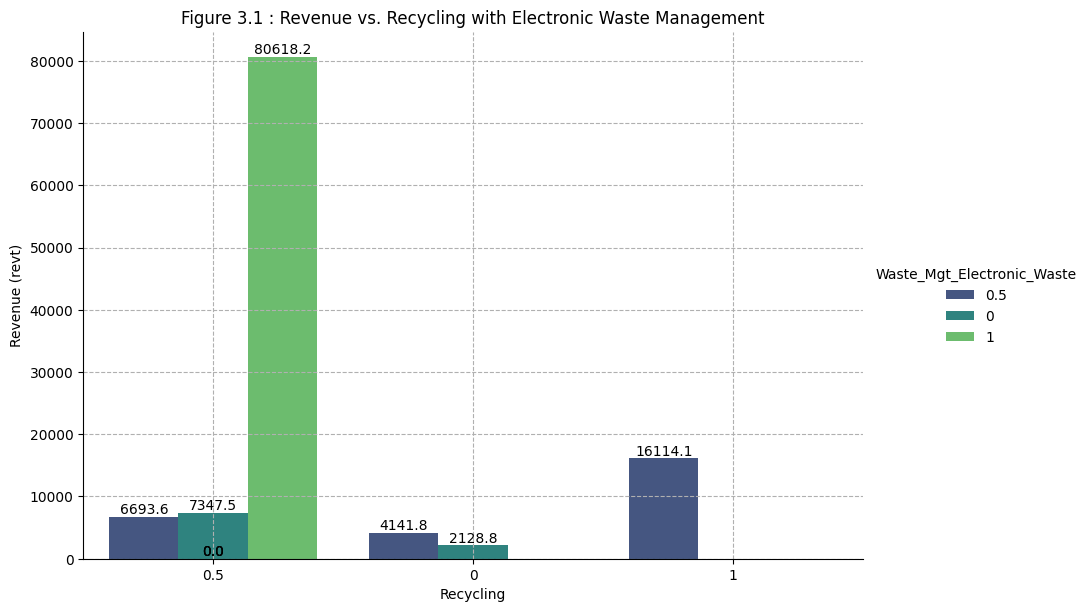

In [ ]:
df_eda = df.dropna(subset=['revt', 'Recycling', 'Waste_Mgt_Electronic_Waste'])
ax = sns.catplot(x='Recycling', y='revt', hue='Waste_Mgt_Electronic_Waste', data=df_eda, errorbar=None,
                 kind='bar', palette='viridis', height=6, aspect=1.5)


ax.ax.grid(True, linestyle='--', linewidth=0.8)
for p in ax.ax.patches:
    ax.ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')

plt.xlabel('Recycling')
plt.ylabel('Revenue (revt)')
plt.title('Figure 3.1 : Revenue vs. Recycling with Electronic Waste Management')
plt.show()


In Figure 3.1, we examine how total revenue varies in relation to distinct aspects such as recycling policies and electronic waste management.

Companies adhering to electronic waste management policies demonstrate a notable surge in overall revenue. Similarly, companies implementing recycling policies exhibit higher revenue compared to those that do not.

However, due to data limitations, we cannot ascertain a clear relationship between revenue when both policies are simultaneously followed.

#Regressions

##Regression 1 : Return on Assets Considering Product Safety and Quality Factors

### Base Regression

In [ ]:
df_regression = df.dropna(subset=['Product_Safety', 'Quality', 'roa'])

formula = 'roa ~ C(Product_Safety) + C(Quality)'
model = sm.OLS.from_formula(formula, data=df_regression).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     14.09
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.74e-11
Time:                        13:59:26   Log-Likelihood:                -32059.
No. Observations:               28721   AIC:                         6.413e+04
Df Residuals:                   28716   BIC:                         6.417e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [ ]:
df_dummy = pd.get_dummies(df[['Product_Safety', 'Quality']], drop_first=True)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_dummy.columns
vif_data["VIF"] = [variance_inflation_factor(df_dummy.values, i) for i in range(df_dummy.shape[1])]

vif_data

,Variable,VIF
0,Product_Safety_0,0.000036
1,Product_Safety_1,0.000361
2,Product_Safety_2,0.100065
3,Quality_0,0.000058
4,Quality_1,0.000242


Low VIF values below 10 indicate minimal multicollinearity among the independent variables in the regression model. While reassuring, they don't ensure model correctness or variable significance.

### Regression with control variables

In [ ]:
df_regression = df.dropna(subset=['Product_Safety', 'Quality', 'roa','at_turn'])
formula = 'roa ~ Product_Safety + Quality + at_turn'
model = sm.OLS.from_formula(formula, data=df_regression).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     458.5
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        13:59:26   Log-Likelihood:                 5825.4
No. Observations:               28441   AIC:                        -1.164e+04
Df Residuals:                   28435   BIC:                        -1.159e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1561    

The addition of the control variable, asset turnover, in the regression analysis unveils notable insights into the impact of product safety and quality on a company's ROA.

A striking observation emerges: Companies with low controversy regarding product safety (Product Safety concerns = 0) transition from insignificance to statistical significance. This underscores the importance of accounting for asset turnover, revealing a clearer understanding of the genuine influence of product safety and quality on a company's ROA.

The second set of results appears more robust, characterized by a greater number of statistically significant coefficients. Notably, the inclusion of asset turnover introduces an additional significant variable (at_turn), enriching the depth of analysis.

Moreover, both sets of results demonstrate consistent magnitudes for the coefficients associated with Product Safety and Quality variables. This consistency underscores the enduring impact of these factors on the dependent variable (ROA), reaffirming their significance in shaping financial performance.

**Overall Inference**

Companies with a history of significant product safety controversies may face financial consequences, as reflected in lower ROA.

Conversely, companies with better reputations for product safety and quality management may enjoy financial benefits in terms of higher ROA.

These findings emphasize the importance of proactive risk management, quality control measures, and maintaining a positive public image for sustaining financial performance in the long term.

[how-cost-poor-quality-impacts-profits](https://www.linkedin.com/pulse/bottom-line-stake-how-cost-poor-quality-impacts-profits-murali/) : This link also talks about how poor quality cost impacts financially on a company.

##Regression 2 : Total Revenue with Recycling and Waste Management

### Base Regression

In [ ]:
df_regression = df[['Recycling', 'Waste_Mgt_Electronic_Waste','R_and_D_Innovation','cogs','revt']]

In [ ]:
formula = 'revt ~ Recycling + Waste_Mgt_Electronic_Waste'
model = sm.OLS.from_formula(formula, data=df_regression).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   revt   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     78.37
Date:                Thu, 02 May 2024   Prob (F-statistic):           4.47e-66
Time:                        13:59:26   Log-Likelihood:            -2.2544e+05
No. Observations:               19801   AIC:                         4.509e+05
Df Residuals:                   19796   BIC:                         4.509e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Regression with control variables

In [ ]:
formula = 'revt ~ Recycling + Waste_Mgt_Electronic_Waste + cogs'
model = sm.OLS.from_formula(formula, data=df_regression).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   revt   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 4.169e+04
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        13:59:26   Log-Likelihood:            -1.6854e+05
No. Observations:               16641   AIC:                         3.371e+05
Df Residuals:                   16635   BIC:                         3.371e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

These findings underscore the financial advantages associated with proactive environmental management practices, particularly in recycling and electronic waste management, within companies.

Notably, companies prioritizing environmental sustainability through initiatives such as recycling and electronic waste management tend to experience higher revenues. Specifically, those emphasizing the reduction of environmental impact in packaging—utilizing recycled content materials and implementing take-back and recycling programs—demonstrate a pronounced positive correlation with overall revenue.

Regarding electronic waste management, companies with higher scores—reflecting adherence to evolving e-waste regulations and robust recycling programs—exhibit a noteworthy positive relationship with total revenue.

However, while the impact of recycling practices on revenue is statistically significant only for companies with higher scores (Recycling value 1), electronic waste management practices significantly influence revenue for both higher (Waste_Mgt_Electronic_Waste value 1) and lower (Waste_Mgt_Electronic_Waste value 0) scores.

Additionally, it's worth noting that the cost of goods sold (COGS) demonstrates a significant positive effect on revenue, further highlighting the intricate relationship between operational costs and revenue generation within these contexts.
COGS here is used as a control variable to understand the nuances of the impact of recyling and electronic waste management on the total revenue








In [ ]:
df_reg=df_regression[['Recycling', 'Waste_Mgt_Electronic_Waste']]

df_dummy = pd.get_dummies(df_reg, drop_first=True)

df_dummy.dropna(inplace=True)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_dummy.columns
vif_data["VIF"] = [variance_inflation_factor(df_dummy.values, i) for i in range(df_dummy.shape[1])]

vif_data


,Variable,VIF
0,Recycling_0,0.000033
1,Recycling_1,0.001264
2,Waste_Mgt_Electronic_Waste_0,0.000654
3,Waste_Mgt_Electronic_Waste_1,0.019608


The VIF for the variables are all lesser than 10% indicating minimal to no impact of multicollinearity on the regression.

##Regression 3 : Raw Material with Emissions, Pollution Prevention and Recycling

###Base Regression

In [ ]:
formula = 'invrm ~ Substantial_Emissions + Pollution_Prevention + Recycling'
model = sm.OLS.from_formula(formula, data=df).fit(conv_type='HC1')

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  invrm   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     330.7
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        13:59:27   Log-Likelihood:            -1.1109e+05
No. Observations:               15849   AIC:                         2.222e+05
Df Residuals:                   15842   BIC:                         2.222e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Regression with control variables

In [ ]:
formula = 'invrm ~ Substantial_Emissions + Pollution_Prevention + Recycling + invt'
model = sm.OLS.from_formula(formula, data=df).fit(conv_type='HC1')

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  invrm   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     1960.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        13:59:27   Log-Likelihood:            -1.0707e+05
No. Observations:               15847   AIC:                         2.141e+05
Df Residuals:                   15839   BIC:                         2.142e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

We observe a notable trend: For the companies which have high substatial emission controversial score of 1, there is a significant impact on positive increase inventory of raw materials. Conversely, companies without such scores demonstrate a comparatively lesser, still positive though, impact on raw material inventory.

Interestingly, a similar pattern emerges with companies implementing policies and strategies for pollution prevention. Those with higher scores tend to exert a greater influence on raw material inventory, underlining the correlation between environmental management practices and inventory management.

Few possible reasons for such behaviour could be :

1. **Supply Chain Uncertainty and Risk Management:** Environmental controversies create supply chain doubts, leading to higher raw material stockpiles.

2. **Regulatory Compliance:** Stricter regulations compel companies to keep larger raw material inventories to meet compliance requirements.

3. **Reputation Management:** Companies build trust by sourcing eco-friendly materials, necessitating increased raw material stockpiles.

[Build up Inventory due to supply chain disruptions](https://www.wsj.com/articles/companies-cut-orders-build-up-inventory-as-supply-disruptions-continue-11653048000)


_"Kodak now holds around six months of inventory, compared with three months before the supply-chain challenges began, Mr. Bullwinkle said."_

Quoting from this article, we see this as an actual phenomenon which impacts the inventory of the raw materials

#Tableau Dashboards

## Dashboard 1

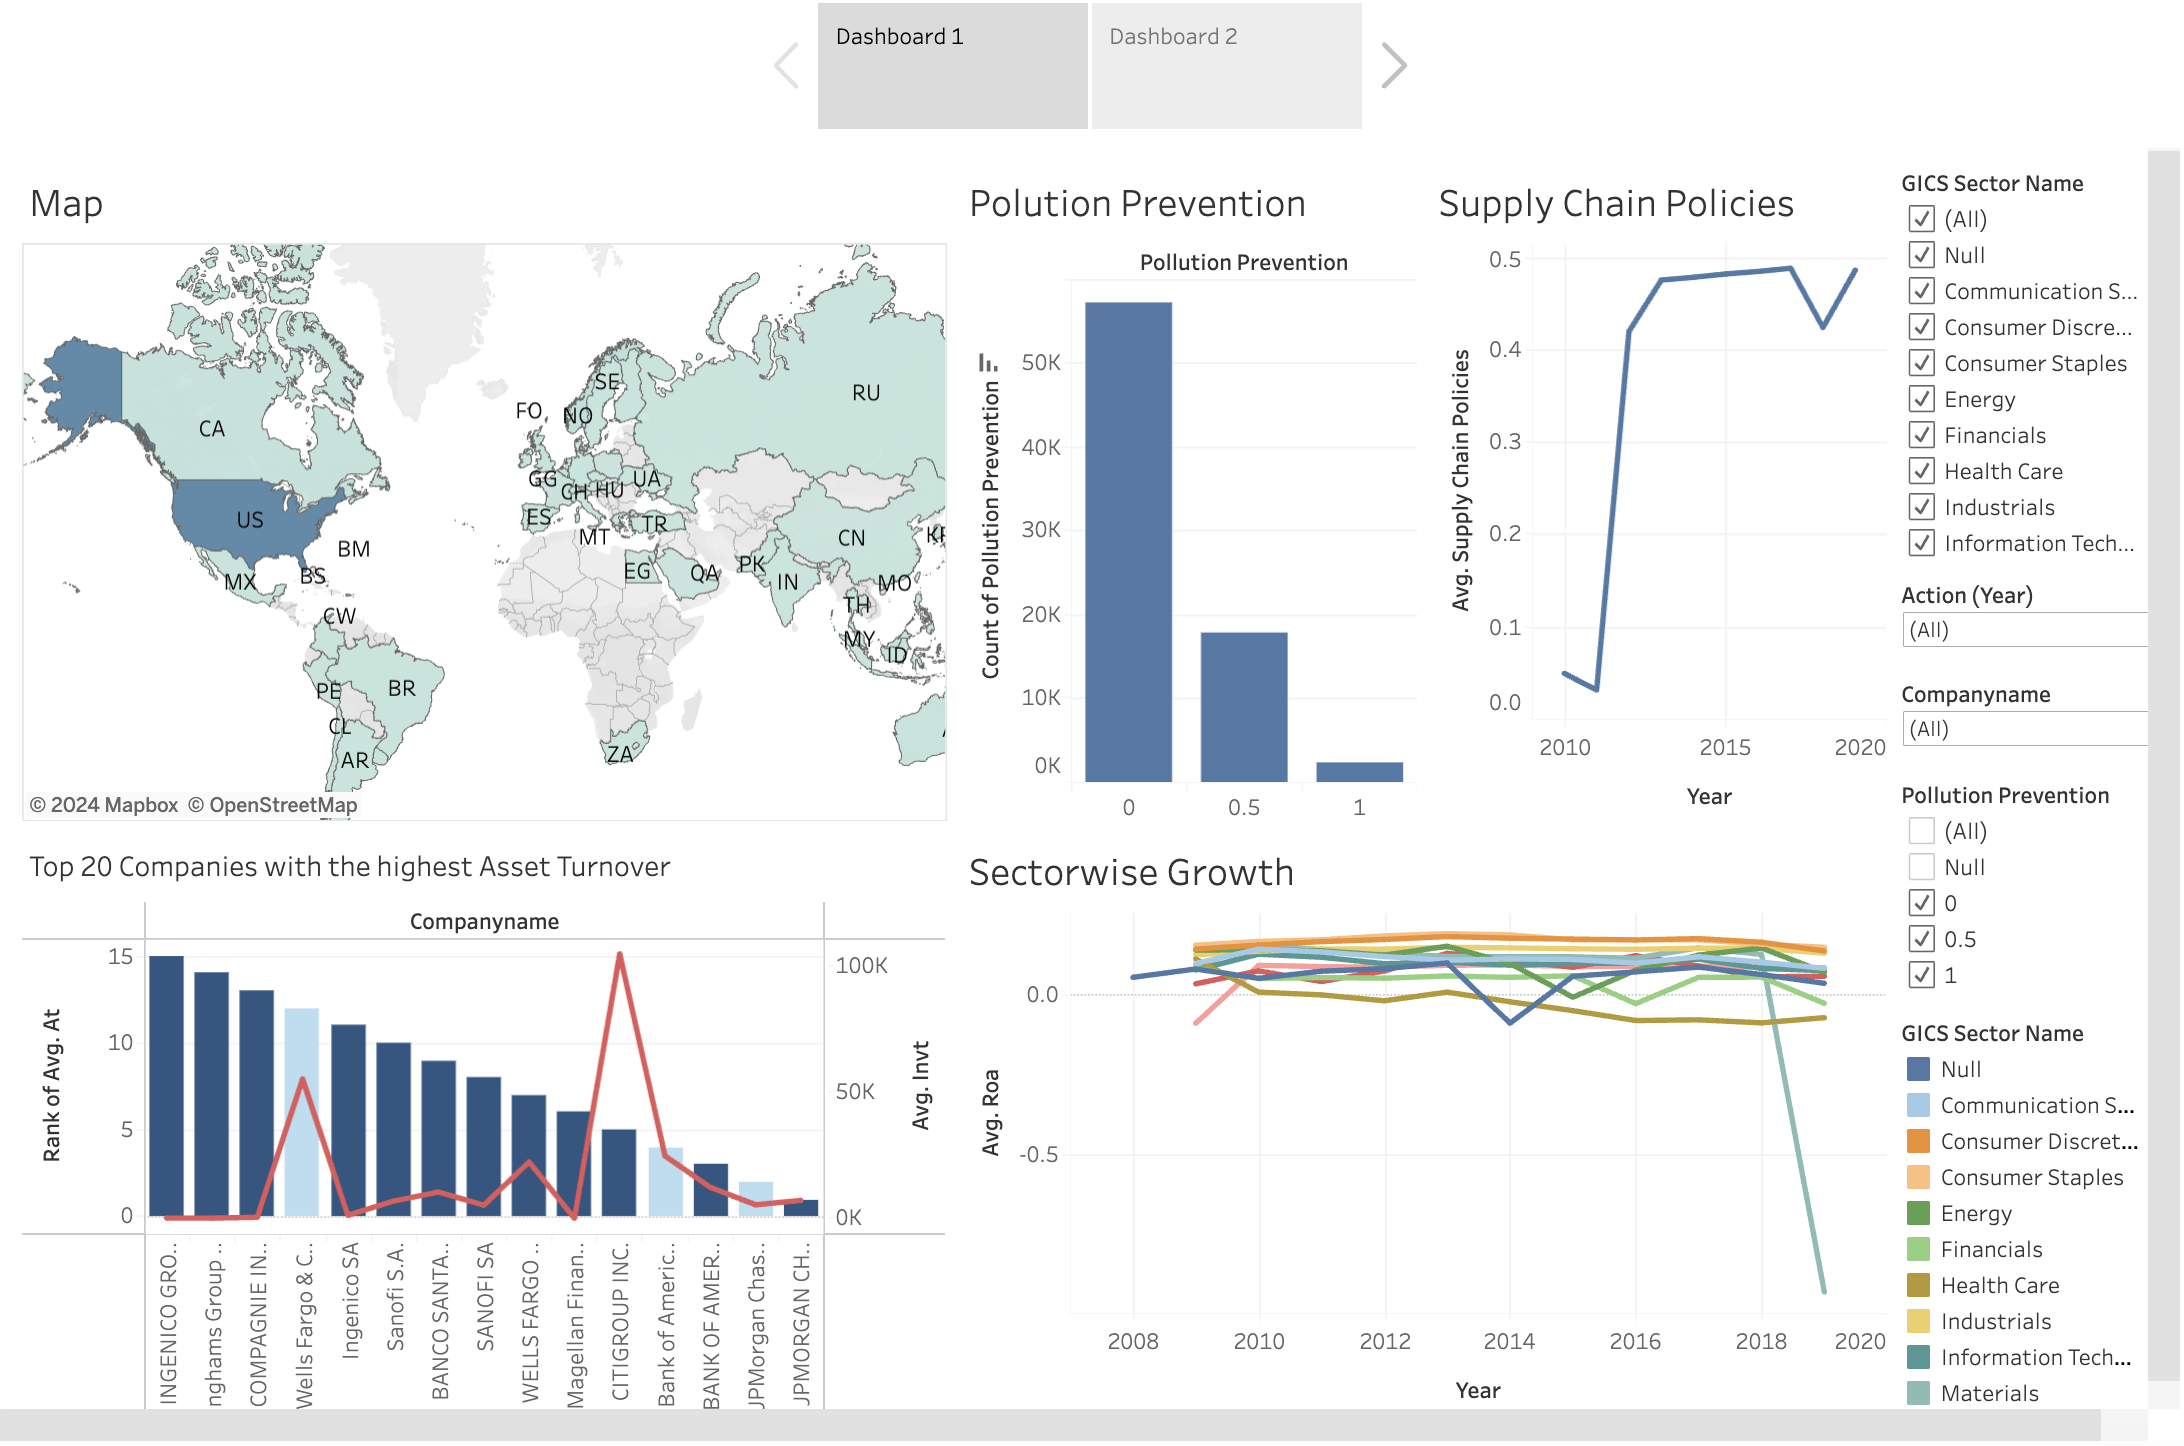

**Insights : **
This dashboard offers a detailed analysis of various companies' design characteristics within different sectors and regions. It evaluates how companies in different countries implement pollution prevention policies and adhere to supply chain policies, while also considering their average return on assets and overall asset turnover. This comprehensive view enables stakeholders to assess the effectiveness of company strategies and performance metrics across different geographic and operational contexts.

It's intriguing to note the increasing trend of companies adhering to supply chain policies over the years, coupled with the significant impact observed on their Return on Assets (ROA).This could be attributed to the implementation of regualtion policies and global environmenatl crisis awareness.

## Dashboard 2

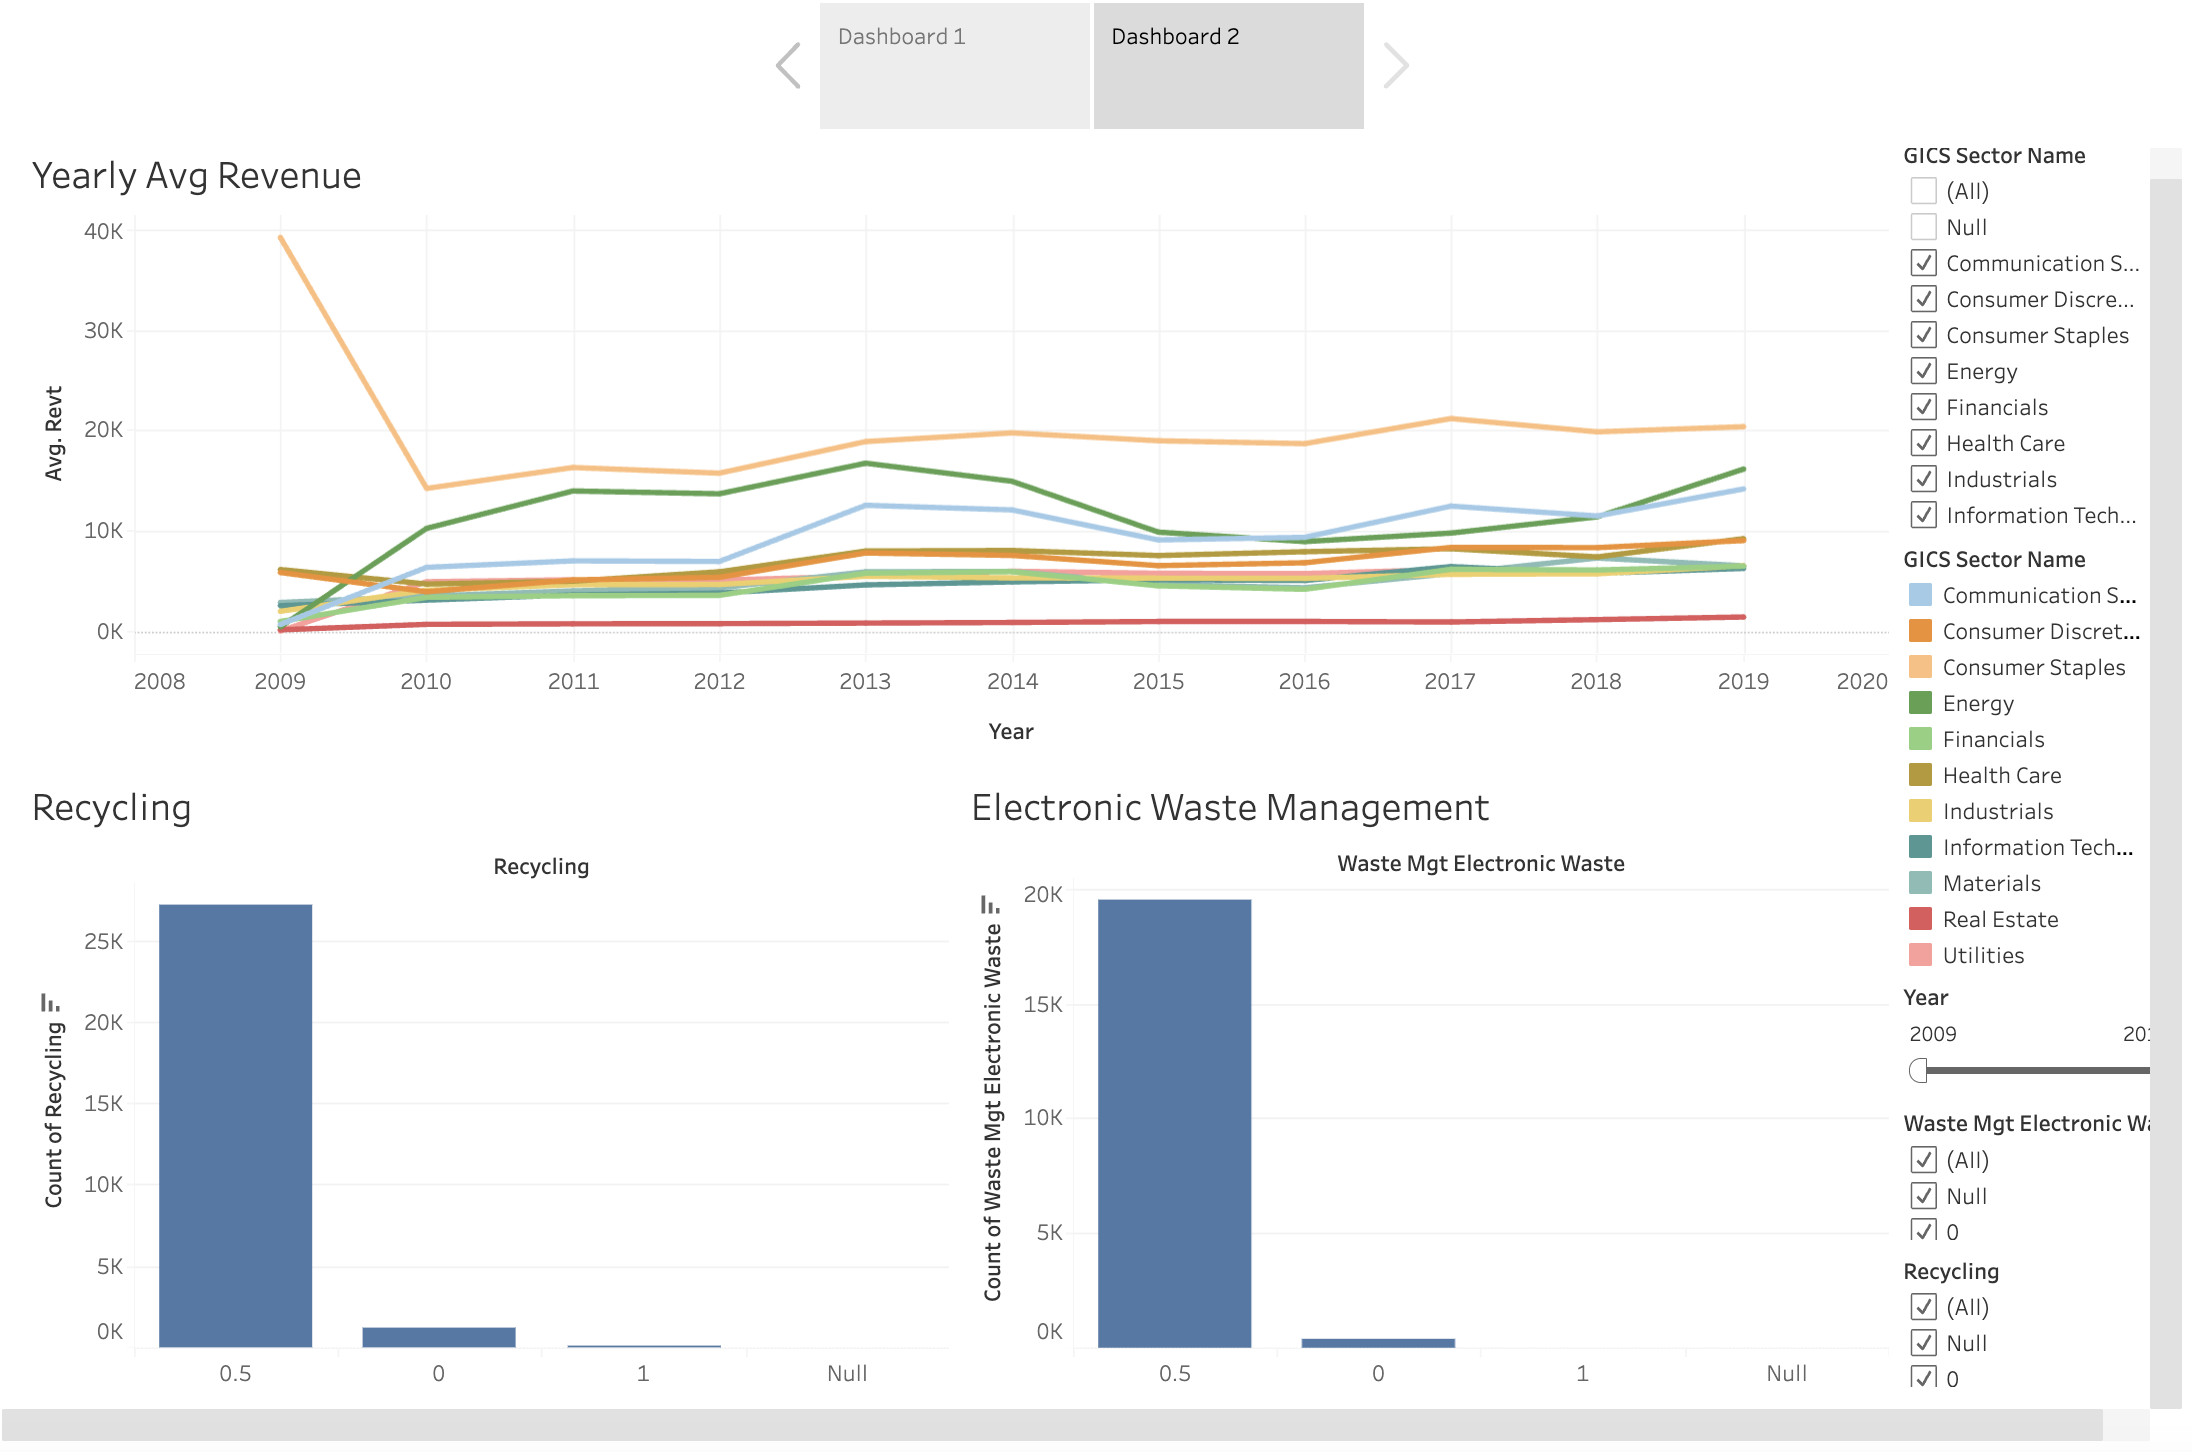

**Insights:**
The second dashboard presents insights closely aligned with the regression analysis conducted in this notebook. It focuses on identifying correlations between average total revenue and the impacts of recycling and electronic waste management across various companies and sectors. By examining these relationships, the dashboard aims to provide a deeper understanding of how environmental management practices influence financial performance within different industry contexts.

#**Summary**


In summary, our analysis highlights the significant impact of supply chain policies and environmental management practices on financial performance within companies.

Companies with a history of product safety controversies tend to experience lower ROA, while those with positive reputations for safety and quality management enjoy higher ROA. This underscores the importance of proactive risk management and quality control measures.

Additionally, companies emphasizing environmental sustainability initiatives, such as recycling and electronic waste management, demonstrate higher revenues. Notably, those prioritizing eco-friendly packaging also experience increased revenue, indicating the financial benefits of environmental responsibility.

Furthermore, our analysis reveals a correlation between environmental controversies and inventory management. Companies facing higher scores in substantial emissions or implementing pollution prevention strategies tend to maintain larger raw material inventories, possibly driven by supply chain uncertainties and regulatory compliance.

Overall, these findings emphasize the critical role of proactive risk management and environmental responsibility in sustaining financial performance and competitiveness in today's business landscape. By aligning supply chain policies and environmental practices with strategic financial goals, companies can enhance resilience and capitalize on opportunities for long-term success.



#**Acknowledgment**

We acknowledge the reference of the following for doing our project

1. Chatgpt to make our wordings and grammar better
2. Websites :

    a. Wharton Research Data Service :
    https://wrds-www.wharton.upenn.edu/pages/about/data-vendors/

    b. Supply chain disruptions :
    https://www.wsj.com/articles/companies-cut-orders-build-up-inventory-as-supply-disruptions-continue-11653048000

    c.Cost of Poor Quality : https://www.linkedin.com/pulse/bottom-line-stake-how-cost-poor-quality-impacts-profits-murali/
    





